## Medical Cost Personal Datasets
### Insurance Forecast by using Linear Regression
#### Source = https://www.kaggle.com/mirichoi0218/insurance

<b>age:</b> age of primary beneficiary

<b>sex:</b> insurance contractor gender, female, male

<b>bmi:</b> Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

<b>children:</b> Number of children covered by health insurance / Number of dependents

<b>smoker:</b> Smoking

<b>region:</b> the beneficiary's residential area in the US, northeast, southeast, southwest, northwest

### Importing Data and Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
%matplotlib inline
sns.set_style("whitegrid")

In [4]:
df = pd.read_csv("insurance.csv")

#### Let's explore the data a bit

In [7]:
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [8]:
df.shape

(1338, 7)

In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [19]:
pd.DataFrame([df.isnull().sum(),df.nunique()], index=["Number of Null", "Number of Unique"]).transpose()

,Number of Null,Number of Unique
age,0,47
sex,0,2
bmi,0,548
children,0,6
smoker,0,2
region,0,4
charges,0,1337


##### We have a data that has 1338 inputs with 7 columns
##### Also there are no null values in it, and it seems all columns have at least 2 unique values, so we can use all of them in our analysis

### Plotting

Text(0.5, 1.0, 'Distribution of Charges')

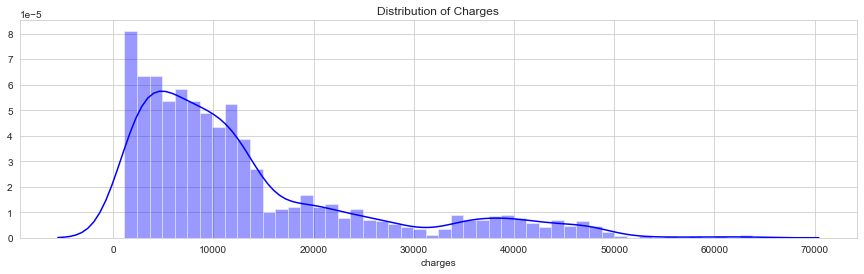

In [22]:
fig, ax = plt.subplots(1,1, figsize=(15,4))
ax = sns.distplot(df["charges"], color="b", bins=50)
plt.title('Distribution of Charges')

## Dist. of Charges has right skew

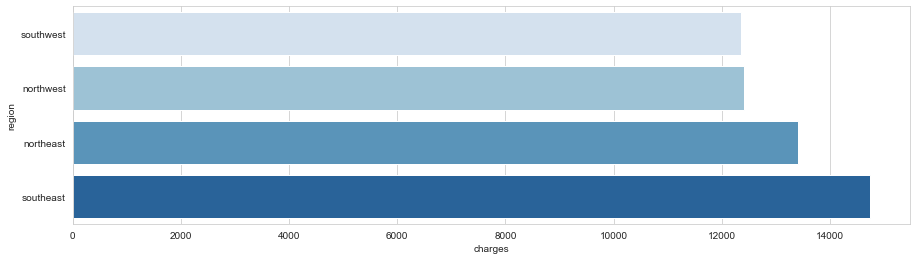

In [23]:
charges = df['charges'].groupby(df["region"]).mean().sort_values(ascending = True)
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
ax = sns.barplot(charges.head(), charges.head().index, palette='Blues')

## Southeast has the highest charges

Text(0.5, 1.0, 'Seperated by Sex')

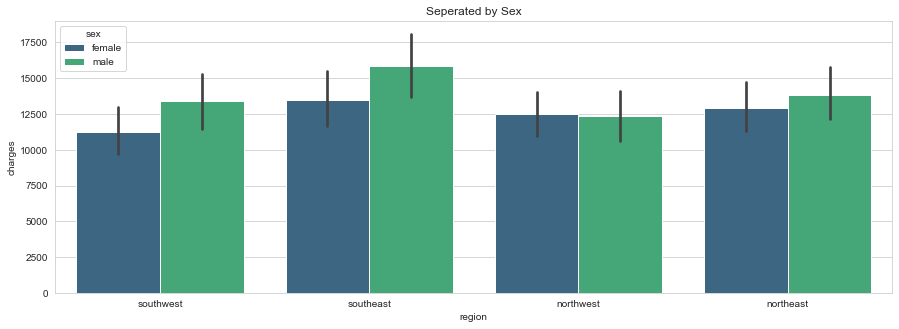

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax = sns.barplot(x='region', y='charges', hue='sex', data=df, palette='viridis')
plt.title("Seperated by Sex")

Text(0.5, 1.0, 'Seperated by Smoking')

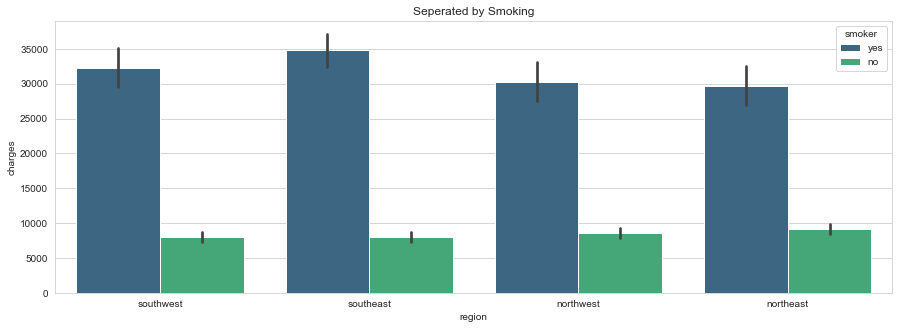

In [28]:
fig, ax = plt.subplots(1,1, figsize=(15,5))
ax = sns.barplot(x = 'region', y = 'charges', hue='smoker', data=df, palette='viridis')
plt.title("Seperated by Smoking")

Text(0.5, 1.0, 'Seperated by Smoking')

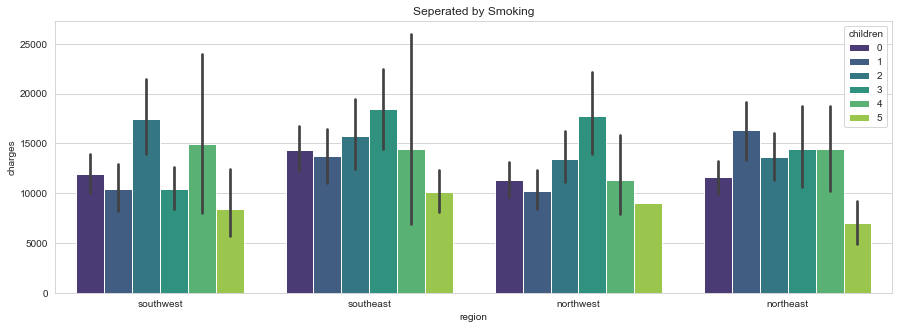

In [27]:
fig, ax = plt.subplots(1,1, figsize=(15,5))
ax = sns.barplot(x = 'region', y = 'charges', hue='children', data=df, palette='viridis')
plt.title("Seperated by Smoking")

#### 1) It seems smoking is affecting to charging-levels very much
#### 2) Let's analyze the medical charges by age, bmi and children according to the smoking factor

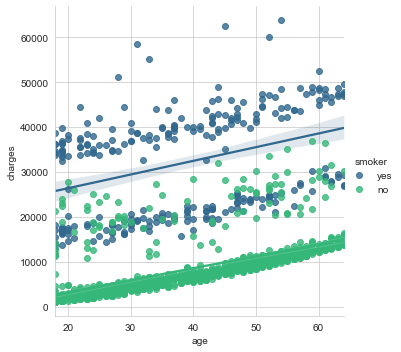

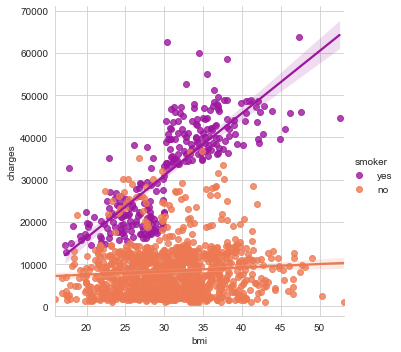

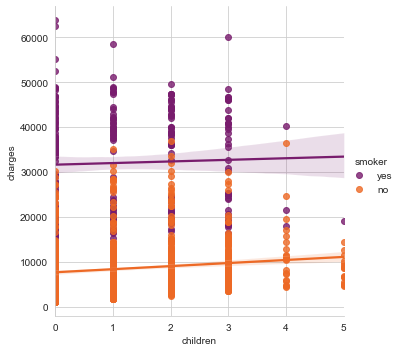

In [38]:
sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker', palette='viridis')
sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='plasma')
sns.lmplot(x = 'children', y = 'charges', data=df, hue='smoker', palette='inferno')

#### Ok, then we can easily say smoking has the highest impact on medical costs, even though the costs are growing with age, bmi and children

### Let's get into the Regression part

#### 1) Converting objects labels into categorical

In [39]:
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

#### 2) Converting category labels into numerical using LabelEncoder

In [40]:
label = LabelEncoder()

label.fit(df["sex"].drop_duplicates())
df["sex"] = label.transform(df["sex"])

label.fit(df["smoker"].drop_duplicates())
df["smoker"] = label.transform(df["smoker"])

label.fit(df["region"].drop_duplicates())
df["region"] = label.transform(df["region"])

df.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

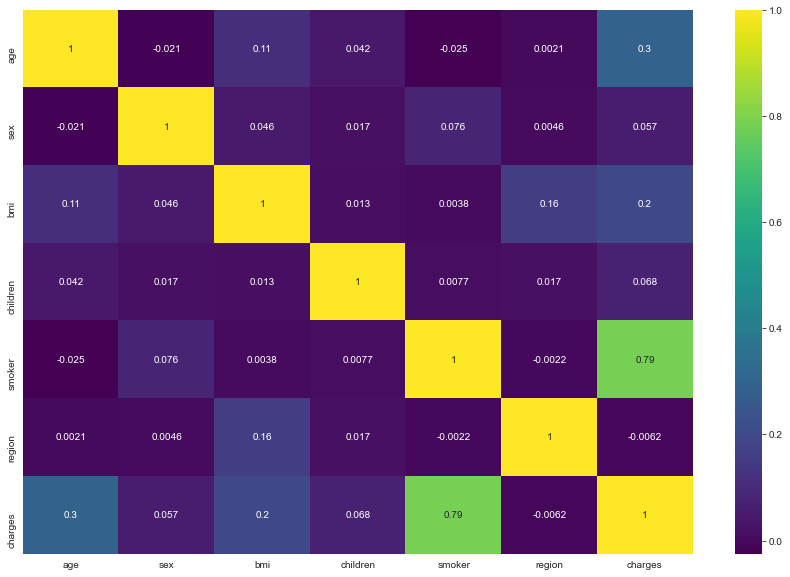

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax = sns.heatmap(df.corr(), annot=True, cmap='viridis')

Again, It seems there is no correlation except between charges and smoker values

#### 3) Linear Regression

In [42]:
x = df.drop(['charges'], axis = 1)
y = df['charges']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [43]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

print("Intercept:",lin_reg.intercept_)
print("Coefficient:",lin_reg.coef_)
print("Score:",lin_reg.score(x_test, y_test))

Intercept: -11261.138825163946
Coefficient: [ 2.50537556e+02  3.65092141e+00  3.22881906e+02  4.50147445e+02
  2.36021161e+04 -3.41244000e+02]
Score: 0.7962732059725786


In [44]:
y_train_pred = lin_reg.predict(x_train)
y_test_pred = lin_reg.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error: 3998.271540886975
Mean Squared Error: 32073628.56010921
Root Mean Squared Error: 5663.358417062195


In [45]:
y_test_pred = lin_reg.predict(x_test)
##Comparing the actual output values with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df

,Actual,Predicted
578,9724.53000,10947.914015
610,8547.69130,9764.827331
569,45702.02235,38027.186254
1034,12950.07120,16076.266564
198,9644.25250,7003.050939
...,...,...
574,13224.05705,14993.031723
1174,4433.91590,6934.890107
1327,9377.90470,10983.730535
817,3597.59600,6810.504924
